In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [4]:
suv_data = pd.read_csv('suv_data.csv')
suv_data.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


In [11]:
X = suv_data.iloc[:,[2,3]].values
y = suv_data.iloc[:,4].values

In [6]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/lalith/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lalith/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lalith/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

/home/lalith/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
prediction = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy = accuracy_score(prediction,y_test)
print(f"accuracy: {accuracy*100}%")

accuracy: 87.5%


In [21]:
from sklearn.metrics import classification_report

In [22]:
classification_report(prediction,y_test)

'              precision    recall  f1-score   support\n\n           0       0.94      0.88      0.91        84\n           1       0.76      0.86      0.81        36\n\n   micro avg       0.88      0.88      0.88       120\n   macro avg       0.85      0.87      0.86       120\nweighted avg       0.88      0.88      0.88       120\n'

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(prediction,y_test)

array([[74, 10],
       [ 5, 31]], dtype=int64)

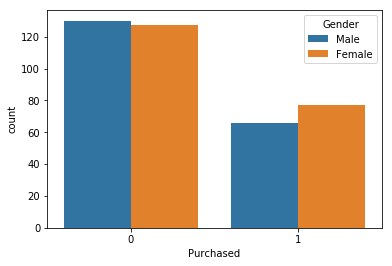

In [25]:
sns.countplot(x='Purchased',data=suv_data,hue='Gender')